In [1]:
import kaggle

In [2]:
kaggle.api.authenticate()

In [3]:
kaggle.api.dataset_download_files('fivethirtyeight/uber-pickups-in-new-york-city',path='Data',quiet=False,unzip=True)

Dataset URL: https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city


100%|██████████| 109M/109M [00:00<00:00, 569MB/s] 


In [4]:
from pathlib import Path

In [5]:
filepath = Path('Data/')
for file in filepath.iterdir():
    print(file)

Data\other-American_B01362.csv
Data\other-Carmel_B00256.csv
Data\other-Dial7_B00887.csv
Data\other-Diplo_B01196.csv
Data\other-Federal_02216.csv
Data\other-FHV-services_jan-aug-2015.csv
Data\other-Firstclass_B01536.csv
Data\other-Highclass_B01717.csv
Data\other-Lyft_B02510.csv
Data\other-Prestige_B01338.csv
Data\other-Skyline_B00111.csv
Data\Uber-Jan-Feb-FOIL.csv
Data\uber-raw-data-apr14.csv
Data\uber-raw-data-aug14.csv
Data\uber-raw-data-janjune-15.csv
Data\uber-raw-data-jul14.csv
Data\uber-raw-data-jun14.csv
Data\uber-raw-data-may14.csv
Data\uber-raw-data-sep14.csv


In [6]:
for file in filepath.glob('**/uber-raw*'):
    print(file)

Data\uber-raw-data-apr14.csv
Data\uber-raw-data-aug14.csv
Data\uber-raw-data-janjune-15.csv
Data\uber-raw-data-jul14.csv
Data\uber-raw-data-jun14.csv
Data\uber-raw-data-may14.csv
Data\uber-raw-data-sep14.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read uber pickups data for year 2015

In [8]:
df = pd.read_csv(r'Data\uber-raw-data-janjune-15.csv')

In [9]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [11]:
df.shape

(14270479, 4)

Prepare pickup data for EDA

Identify and remove duplicate records

In [12]:
df.duplicated().sum()

898225

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(13372254, 4)

Check null values 

In [15]:
df.isnull().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     160702
locationID                   0
dtype: int64

Check Datatypes and correct if required

In [16]:
df.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

Convert the date datatype to datetime

In [17]:
df['Pickup_date'] = pd.to_datetime(df['Pickup_date'])

In [18]:
df.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

Create date related columns for time intelligence analysis

In [19]:
df['Month'] = df['Pickup_date'].dt.month
df['Month_name'] = df['Pickup_date'].dt.month_name()
df['Day'] = df['Pickup_date'].dt.day
df['Weekday'] = df['Pickup_date'].dt.day_name()
df['Hour'] = df['Pickup_date'].dt.hour
df['Minute'] = df['Pickup_date'].dt.minute
df['Second'] = df['Pickup_date'].dt.second

In [20]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Month_name,Day,Weekday,Hour,Minute,Second
0,B02617,2015-05-17 09:47:00,B02617,141,5,May,17,Sunday,9,47,0
1,B02617,2015-05-17 09:47:00,B02617,65,5,May,17,Sunday,9,47,0
2,B02617,2015-05-17 09:47:00,B02617,100,5,May,17,Sunday,9,47,0
3,B02617,2015-05-17 09:47:00,B02774,80,5,May,17,Sunday,9,47,0
4,B02617,2015-05-17 09:47:00,B02617,90,5,May,17,Sunday,9,47,0


Exploratory Data Analysis and Visualization

Monthly and Weekly Pattern Analysis

### Q1. Find average trips per month in year 2015.

In [21]:
len(df) / df['Month'].nunique()

2228709.0

### Q2. Identify which month had maximum trips.

In [22]:
# Method 1 - Group by data using month_name column
df.groupby(['Month_name']).size().sort_values(ascending=False)

Month_name
June        2571771
May         2483980
February    2222189
April       2112705
March       2062639
January     1918970
dtype: int64

In [23]:
df.groupby(['Month_name']).size().sort_values(ascending=False).index[0]

'June'

In [24]:
# Method 2 - Use value_counts function to fetch month wise pickup counts
df['Month_name'].value_counts()

Month_name
June        2571771
May         2483980
February    2222189
April       2112705
March       2062639
January     1918970
Name: count, dtype: int64

In [25]:
df['Month_name'].value_counts().index[0]

'June'

### Q3. Plot the above data using pandas plot method

<Axes: xlabel='Month_name'>

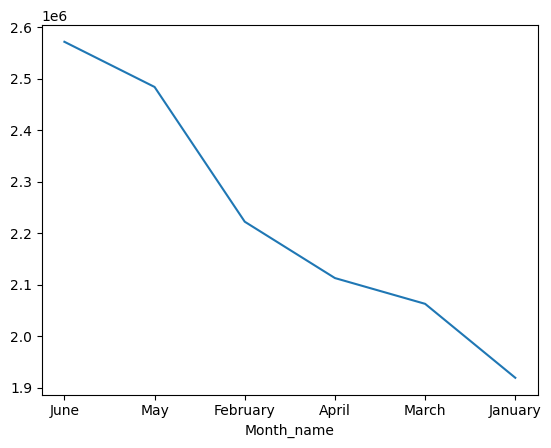

In [26]:
df['Month_name'].value_counts().plot()

### Q4. Plot the above data using pandas plot method - bar chart

<Axes: xlabel='Month_name'>

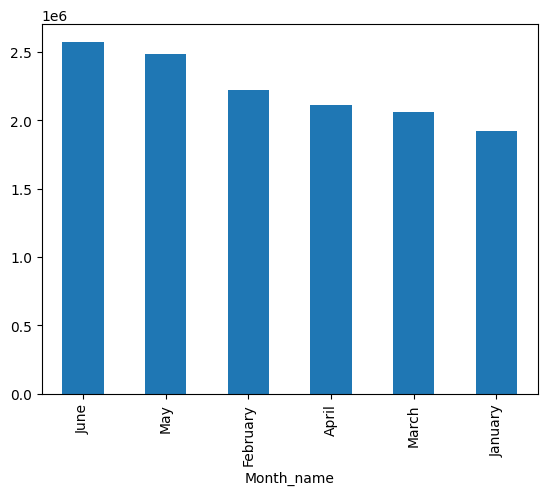

In [27]:
df['Month_name'].value_counts().plot(kind='bar')

### Q5. Plot the above data using seaborn's barplot

In [28]:
df_month_data = df['Month_name'].value_counts().to_frame()
df_month_data

,count
Month_name,
June,2571771
May,2483980
February,2222189
April,2112705
March,2062639
January,1918970


<Axes: xlabel='Month_name', ylabel='count'>

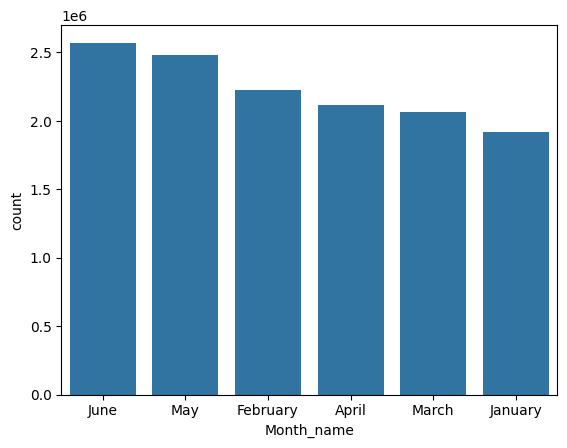

In [29]:
sns.barplot(data=df_month_data, x='Month_name', y='count')

### Q6. Identify the month and day which had the maximum number of trips overall.

In [30]:
df[['Month_name','Day']].value_counts().index[0]

('June', 27)

### Q7. Identify the day for each month which had the maximum number of trips.

In [31]:
# group data on month and day and get total pickups
df_grouped = df.groupby(['Month','Day'], as_index=False).size()

# sort the grouped data by size in descending order, partition by month and generate rank
df_grouped['Rank'] = df_grouped.sort_values('size', ascending=False).groupby('Month').cumcount()+1
df_grouped

,Month,Day,size,Rank
0,1,1,56992,23
1,1,2,39588,30
2,1,3,58881,19
3,1,4,41290,29
4,1,5,42844,28
...,...,...,...,...
176,6,26,91319,9
177,6,27,119208,1
178,6,28,85442,14
179,6,29,69605,30


In [32]:
# fetch all the records where rank = 1
df_grouped[df_grouped['Rank'] == 1]

,Month,Day,size,Rank
30,1,31,92751,1
50,2,20,100881,1
78,3,20,85071,1
114,4,25,96260,1
135,5,16,108596,1
177,6,27,119208,1


### Q8. Identify top 3 busiest days of week.

In [33]:
df['Weekday'].value_counts().head(3)

Weekday
Saturday    2257365
Friday      2138827
Thursday    2010859
Name: count, dtype: int64

### Q9. Plot the data using bar chart

<Axes: xlabel='Weekday'>

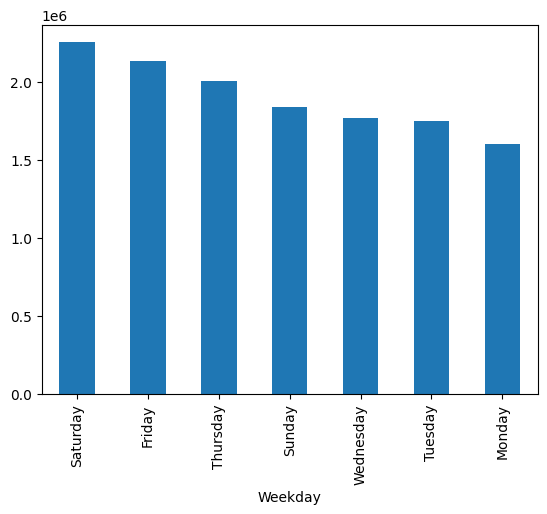

In [34]:
df['Weekday'].value_counts().plot(kind='bar')

### Q10. Analyze the number of trips by month and weekday.

In [35]:
df_pivot = pd.crosstab(index=df['Month_name'], columns=df['Weekday'])
df_pivot

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month_name,,,,,,,
April,315002,238429,324545,273560,372522,250632,338015
February,373550,274948,368311,296130,335603,287260,286387
January,339285,190606,386049,230487,330319,196574,245650
June,371225,375312,399377,334434,357782,405500,328141
March,309631,269931,314785,313865,277026,320634,256767
May,430134,255501,464298,390391,337607,290004,316045


### Q11. Plot above data using pandas plot method

<Axes: xlabel='Month_name'>

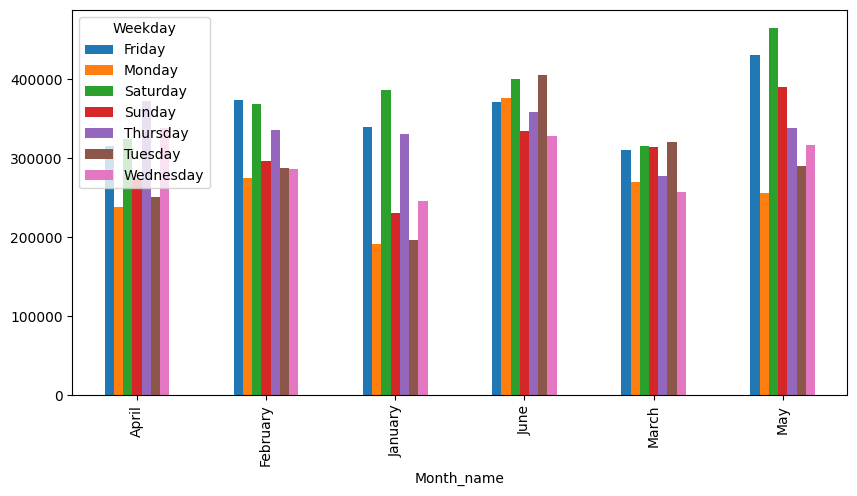

In [36]:
df_pivot.plot(kind='bar', figsize=(10,5))

Weekday vs Weekend Analysis

### Q12. Analyze weekend vs weekday trips. Calculate total trips for weekday and weekend along with their percent contribution.

In [37]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

In [38]:
weekday_trips = df[df['Weekday'].isin(weekdays)]
weekend_trips = df[df['Weekday'].isin(weekends)]

In [39]:
print(f"Weekday trips: {len(weekday_trips):,} ({len(weekday_trips)/len(df)*100:.1f}%)")
print(f"Weekend trips: {len(weekend_trips):,} ({len(weekend_trips)/len(df)*100:.1f}%)")

Weekday trips: 9,276,022 (69.4%)
Weekend trips: 4,096,232 (30.6%)


### Q13. Calculate average trips per day for weekend and weekdays.

In [40]:
print(f"Average weekday trips per day: {len(weekday_trips)/len(weekdays):.0f}")
print(f"Average weekend trips per day: {len(weekend_trips)/len(weekends):.0f}")

Average weekday trips per day: 1855204
Average weekend trips per day: 2048116


Hourly Pattern Analysis

### Q14. Identify top 5 busiest hours overall.

In [41]:
df['Hour'].value_counts().head()

Hour
19    928175
18    910605
20    872198
21    851426
22    844112
Name: count, dtype: int64

### Q15. Identify 5 non-peak hours.

In [42]:
df['Hour'].value_counts().tail()

Hour
6    279978
2    246387
5    189086
3    176216
4    168058
Name: count, dtype: int64

### Q16. Plot hourly pickups using bar chart.

<Axes: xlabel='Hour'>

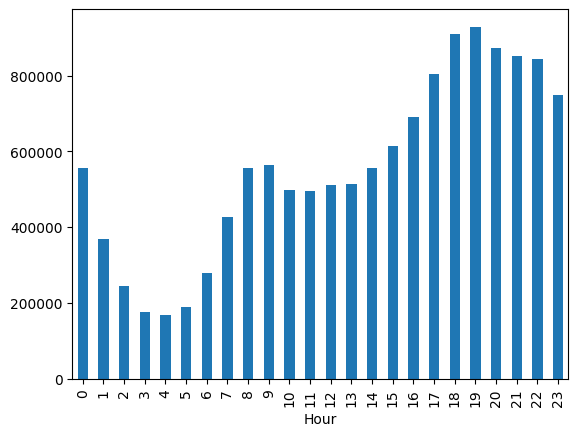

In [43]:
df['Hour'].value_counts().sort_index().plot(kind='bar')

### Q17. Analyze hourly rush in New York city by weekdays.

In [44]:
df_hourly_data = df.groupby(['Hour','Weekday'], as_index=False).size()
df_hourly_data.head(20)

,Hour,Weekday,size
0,0,Friday,79879
1,0,Monday,47608
2,0,Saturday,132555
3,0,Sunday,141673
4,0,Thursday,63000
5,0,Tuesday,42659
6,0,Wednesday,49928
7,1,Friday,44563
8,1,Monday,27093
9,1,Saturday,95562


### Q18. Plot above data using seaborn's pointplot

Text(0, 0.5, 'Number of Trips')

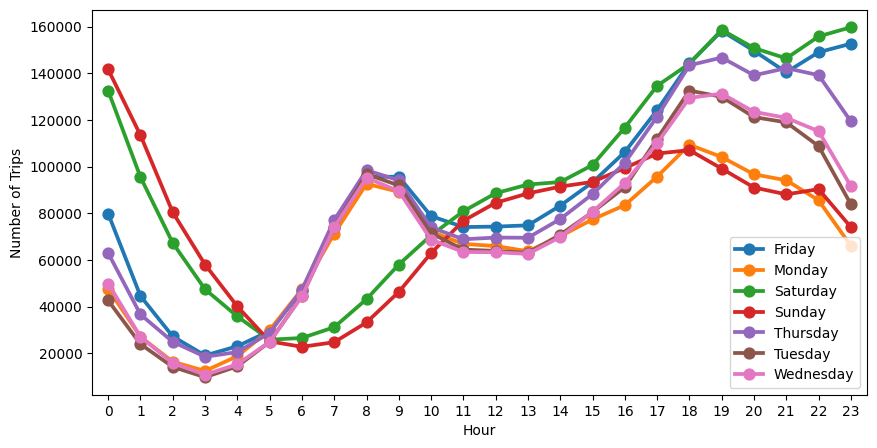

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(data=df_hourly_data, x='Hour', y='size', hue='Weekday')
plt.legend(loc=4)
plt.ylabel('Number of Trips')

### Q19. Perform peak hour analyis by converting hour to categorical column and calculate number of trips.

In [46]:
df['Hour_Category'] = df['Hour'].apply(lambda x: 
   'Early Morning (0-6)' if 0 <= x <= 6 else
   'Morning Rush (7-9)' if 7 <= x <= 9 else
   'Mid-Morning (10-12)' if 10 <= x <= 12 else
   'Afternoon (13-16)' if 13 <= x <= 16 else
   'Evening Rush (17-19)' if 17 <= x <= 19 else
   'Night (20-23)')

hour_category_counts = df['Hour_Category'].value_counts()
hour_category_counts

Hour_Category
Night (20-23)           3315349
Evening Rush (17-19)    2642694
Afternoon (13-16)       2377731
Early Morning (0-6)     1985410
Morning Rush (7-9)      1546403
Mid-Morning (10-12)     1504667
Name: count, dtype: int64

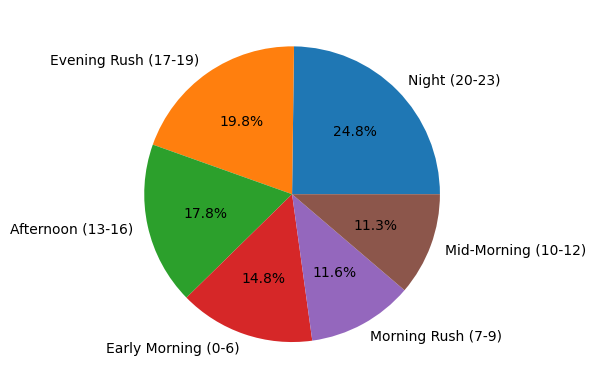

In [47]:
hour_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.ylabel('')
plt.show()

### Q20. Create function to analyze rush using different parameters at runtime.

In [48]:
def func(col1, col2, df):
    new_df = pd.crosstab(index=df[col1], columns=df[col2])
    return new_df

#### Analyze the rush by day and hour

<Axes: xlabel='Hour', ylabel='Day'>

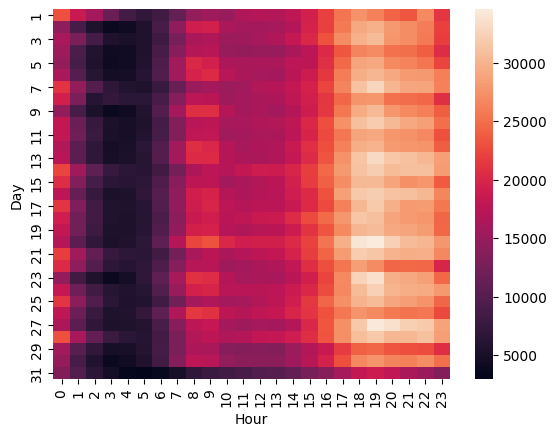

In [49]:
df_rush = func('Day', 'Hour', df)
sns.heatmap(data=df_rush)

#### Analyze the rush by weekday and hour

<Axes: xlabel='Weekday', ylabel='Hour'>

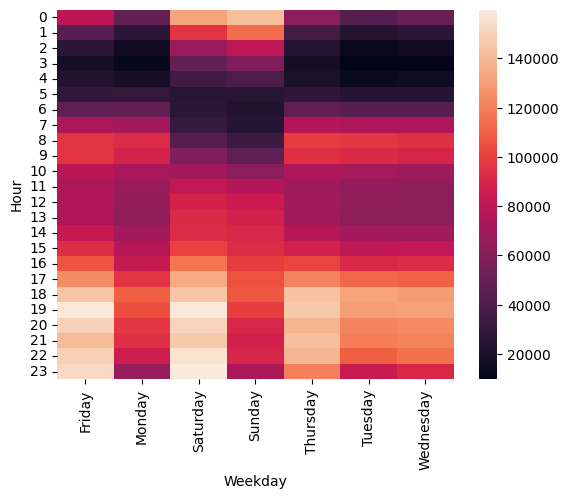

In [50]:
df_rush = func('Hour', 'Weekday', df)
sns.heatmap(data=df_rush)

#### Analyze the rush by month and weekday

<Axes: xlabel='Month_name', ylabel='Weekday'>

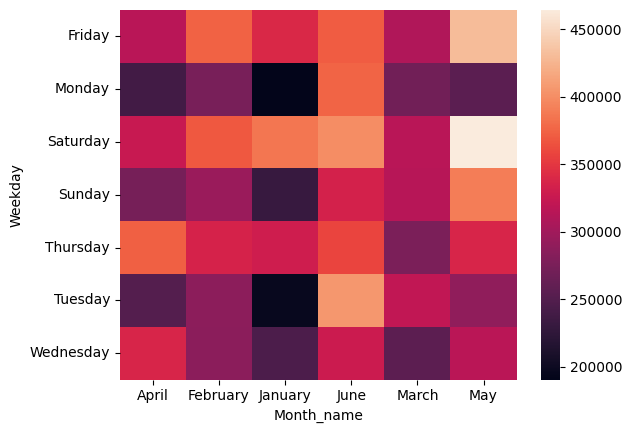

In [51]:
df_rush = func('Weekday', 'Month_name', df)
# df.style.background_gradient()
sns.heatmap(data=df_rush)

Base Performance Analysis
### Q21. Identify most and least active base.

In [52]:
df_base_data = df['Dispatching_base_num'].value_counts()
df_base_data

Dispatching_base_num
B02764    5377732
B02682    3151682
B02617    1973451
B02598    1468261
B02765    1122882
B02512     249808
B02835      26448
B02836       1990
Name: count, dtype: int64

In [53]:
# most active base
df_base_data.index[0]

'B02764'

In [54]:
# least active base
df_base_data.index[-1]

'B02836'

### Q22. Plot the base distribution using pie chart

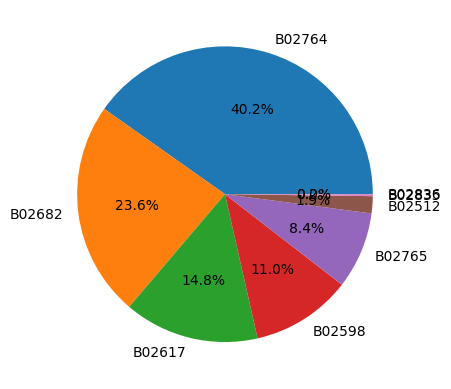

In [55]:
df_base_data.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.ylabel('')
plt.show()

### Q23. Identify the busiest hour for each base.

In [ ]:
for base in df_base_data.index[:]:
    base_data = df[df['Dispatching_base_num'] == base]
    peak_hour = base_data['Hour'].mode()[0]
    print(f"  {base}: {len(base_data)} trips, Peak hour: {peak_hour}:00")

  B02764: 5377732 trips, Peak hour: 19:00
  B02682: 3151682 trips, Peak hour: 19:00
  B02617: 1973451 trips, Peak hour: 18:00
  B02598: 1468261 trips, Peak hour: 18:00
  B02765: 1122882 trips, Peak hour: 19:00
  B02512: 249808 trips, Peak hour: 18:00
  B02835: 26448 trips, Peak hour: 22:00
  B02836: 1990 trips, Peak hour: 18:00
